In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, peak_signal_noise_ratio

# Наложение и удаление шума

In [2]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

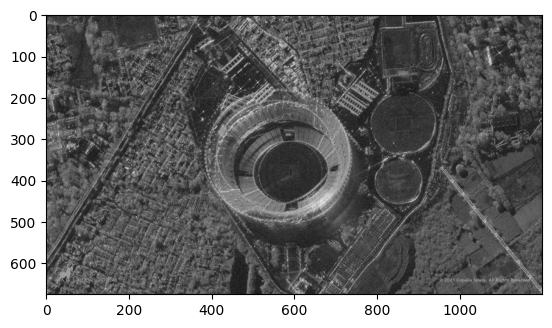

In [3]:
plt.imshow(image_gray, cmap="gray")

In [4]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,  16,   0, ..., 111,   0,  80],
       [  1, 104,  68, ...,   0, 103,   0],
       [  0,   0,  51, ...,   0,   0, 145],
       ...,
       [  0,   0,  39, ..., 255,   0,  15],
       [  0,  34,   0, ...,   0,   5, 135],
       [160, 204,   0, ...,  21,   0, 109]],
      shape=(675, 1200), dtype=uint8)

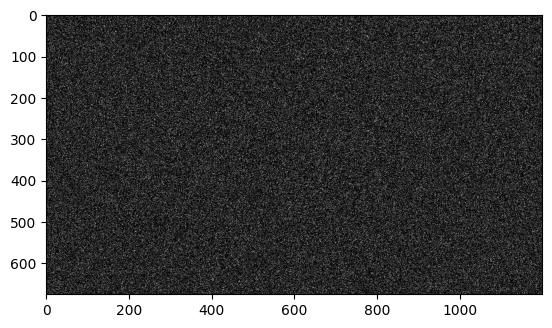

In [5]:
plt.imshow(noise_gauss, cmap="gray")

In [6]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [7]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [8]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

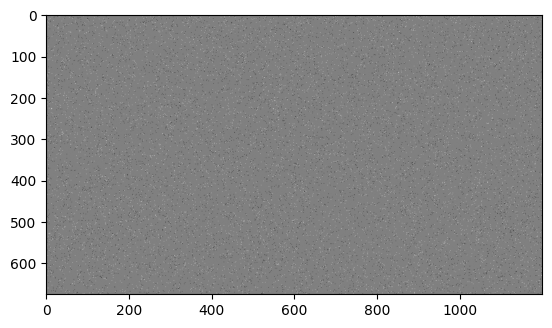

In [9]:
plt.imshow(bg_image, cmap="gray")

In [10]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

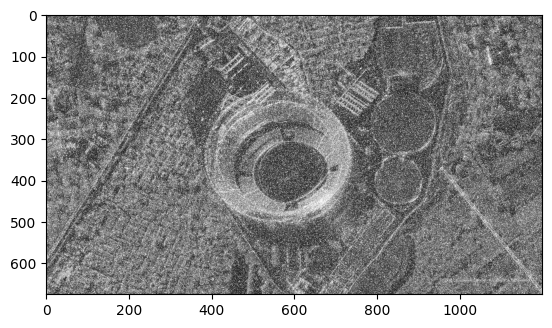

In [11]:
plt.imshow(image_noise_gauss, cmap="gray")

In [12]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4230.673058024691 0.1869926680003536


In [13]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [14]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [15]:
print(mse_gauss_median, ssim_gauss_median)

1038.0453432098766 0.4282430571563417


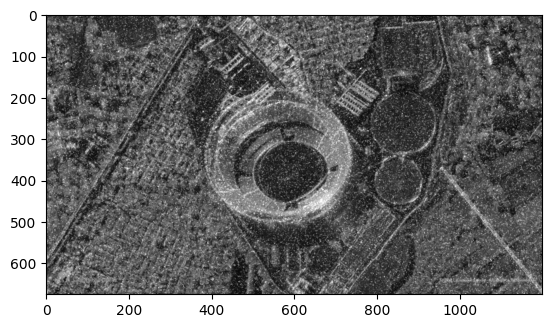

In [16]:
plt.imshow(image_gauss_median, cmap="gray")

In [17]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

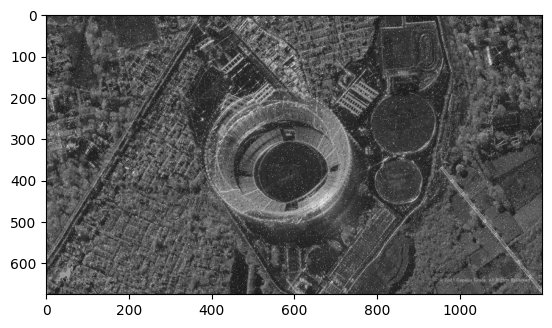

In [18]:
plt.imshow(image_sp, cmap="gray")

In [19]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

385.8657259259259 0.7227146636806058


In [20]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [21]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.87157407407408 0.8161048871438442


# Другие типы фильтров

In [22]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [23]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [24]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [25]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


C:\Users\smeta\AppData\Local\Temp\ipykernel_1200\164976186.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod1 *= a[i,j]


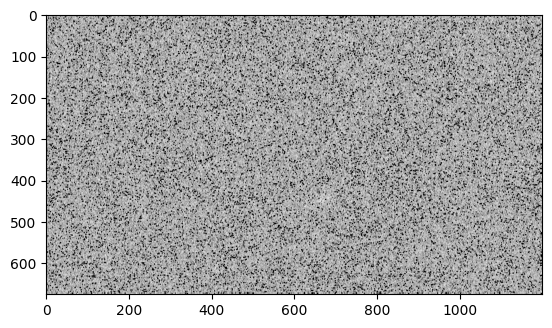

In [26]:
plt.imshow(res, cmap="gray")

In [27]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

6551.976648148148 0.02746126776511091



# 2D свертка

In [28]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [29]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [30]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [31]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

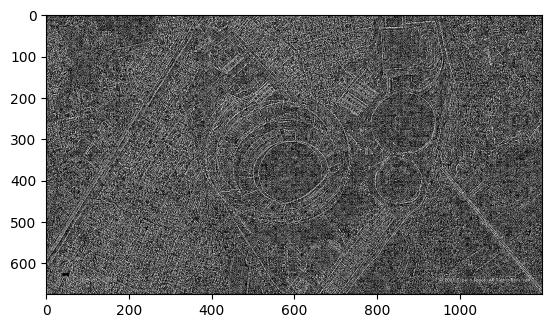

In [32]:
plt.imshow(image_lapl, cmap="gray")

In [33]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [35]:
def add_gaussian_noise(image, mean=0, stddev=100):
    noise_gauss = np.zeros(image.shape, np.uint8)
    cv2.randn(noise_gauss, mean, stddev)
    return cv2.add(image, noise_gauss)

In [36]:
def add_uniform_noise(image, intensity=70):
    noise_constant = np.random.uniform(-intensity, intensity, image.shape)
    noise_constant = noise_constant.astype(np.int16)
    image_noisy = image.astype(np.int16) + noise_constant
    return np.clip(image_noisy, 0, 255).astype(np.uint8)

In [37]:
def test_filters(image, noise_images):
    filters = {
        "Median": (cv2.medianBlur, (5,)),
        "Gauss": (cv2.GaussianBlur, ((5, 5), 0)),
        "Bilateral": (cv2.bilateralFilter, (9, 75, 75)),
        "NL Means": (cv2.fastNlMeansDenoising, (None, 10, 7, 21))
    }
    
    best_psnr = {"Gauss": (None, 0), "Constant": (None, 0)}
    best_ssim = {"Gauss": (None, 0), "Constant": (None, 0)}
    
    plt.figure(figsize=(8, 10))
    i = 1
    
    for noise_name, noise_image in noise_images.items():
        for filter_name, (filter_command, filter_params) in filters.items():
            image_filtered = filter_command(noise_image, *filter_params)
            
            plt.subplot(4, 2, i)
            plt.imshow(image_filtered, cmap='gray')
            plt.title(f"{noise_name} noise - {filter_name} filter")
            plt.axis('off')
            i += 1
            
            image_psnr = peak_signal_noise_ratio(image, image_filtered)
            image_ssim = structural_similarity(image, image_filtered)
            print(f"{noise_name} noise; {filter_name} filter; PSNR = {image_psnr:.4f}; SSIM = {image_ssim:.4f}")
            
            if image_psnr > best_psnr[noise_name][1]:
                best_psnr[noise_name] = (filter_name, image_psnr)
            
            if image_ssim > best_ssim[noise_name][1]:
                best_ssim[noise_name] = (filter_name, image_ssim)
    
    plt.tight_layout()
    plt.show()
    
    return best_psnr, best_ssim, filters

In [38]:
def find_best_filter(best_psnr, best_ssim, filters, noise_images):
    filter_wins = {name: 0 for name in filters.keys()}
    
    for noise in noise_images.keys():
        print(f"{noise} noise:")
        print(f"  Best filter (by PSNR): {best_psnr[noise][0]}; PSNR = {best_psnr[noise][1]:.4f}")
        print(f"  Best filter (by SSIM): {best_ssim[noise][0]}; SSIM = {best_ssim[noise][1]:.4f}")
        
        filter_wins[best_psnr[noise][0]] += 1
        filter_wins[best_ssim[noise][0]] += 1
    
    leader_filter = max(filter_wins, key=filter_wins.get)
    
    print("\nBest filter:")
    print(f"  {leader_filter} ({filter_wins[leader_filter]} wins)")
    
    return leader_filter

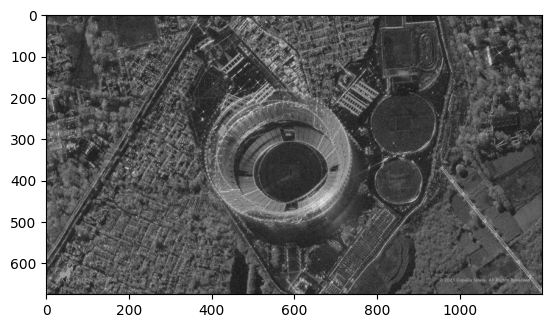

In [39]:
image = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

In [40]:
image_noise_gauss = add_gaussian_noise(image, mean=0, stddev=100)
image_noise_constant = add_uniform_noise(image, intensity=70)

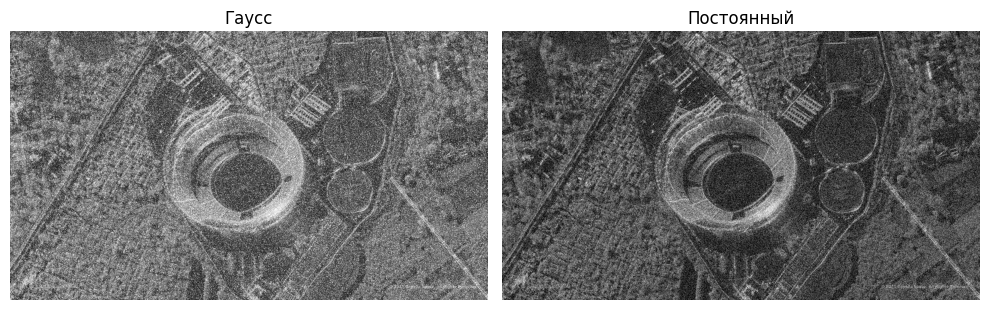

In [42]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_noise_gauss, cmap='gray')
plt.title("Гаусс")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_noise_constant, cmap='gray')
plt.title("Постоянный")
plt.axis('off')
plt.tight_layout()

In [43]:
noise_images = {
    "Gauss": image_noise_gauss,
    "Constant": image_noise_constant
}

Gauss noise; Median filter; PSNR = 19.6511; SSIM = 0.4706
Gauss noise; Gauss filter; PSNR = 15.6712; SSIM = 0.4866
Gauss noise; Bilateral filter; PSNR = 15.4924; SSIM = 0.3151
Gauss noise; NL Means filter; PSNR = 11.8715; SSIM = 0.1873
Constant noise; Median filter; PSNR = 22.5212; SSIM = 0.4493
Constant noise; Gauss filter; PSNR = 24.5335; SSIM = 0.6148
Constant noise; Bilateral filter; PSNR = 23.5529; SSIM = 0.5376
Constant noise; NL Means filter; PSNR = 16.2878; SSIM = 0.2899


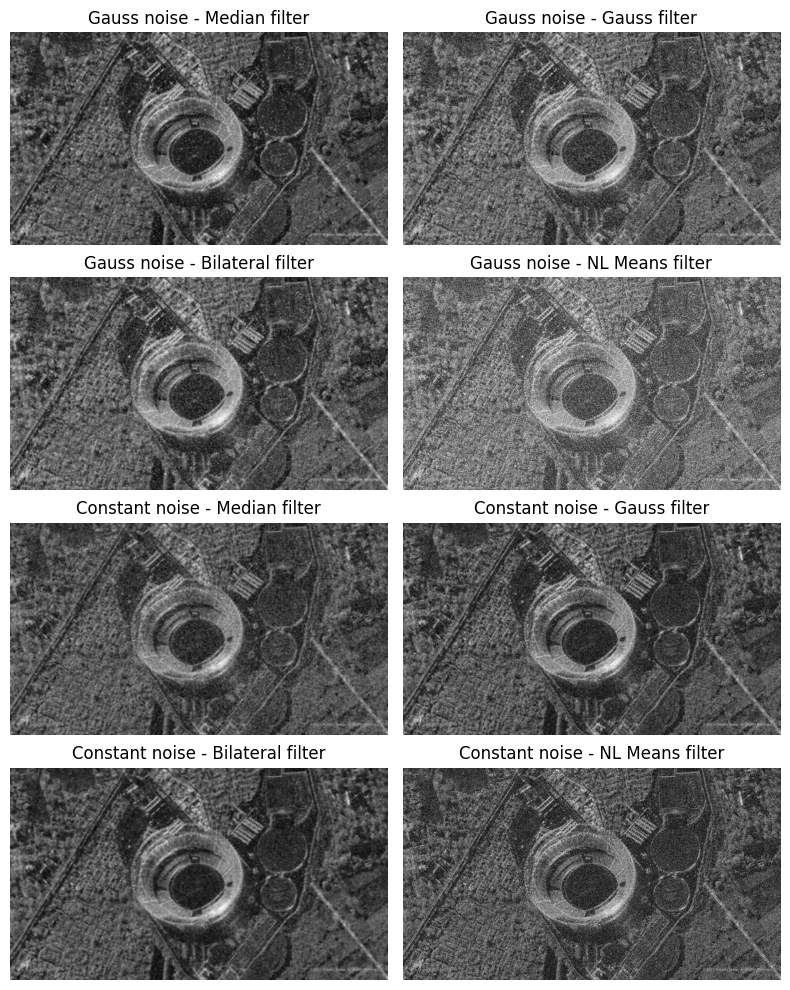

Gauss noise:
  Best filter (by PSNR): Median; PSNR = 19.6511
  Best filter (by SSIM): Gauss; SSIM = 0.4866
Constant noise:
  Best filter (by PSNR): Gauss; PSNR = 24.5335
  Best filter (by SSIM): Gauss; SSIM = 0.6148

Best filter:
  Gauss (3 wins)


In [45]:
best_psnr, best_ssim, filters = test_filters(image, noise_images)
leader_filter = find_best_filter(best_psnr, best_ssim, filters, noise_images)

In [ ]:
# Были неправильно сделаны методы для шума Гаусса и равномерного, переделал.